In [1]:
#package imports

from ase.io import read,write 
from ase.visualize import view
from ase.build import add_adsorbate
from ase.constraints import FixAtoms
from ase.neighborlist import NeighborList,build_neighbor_list, natural_cutoffs,primitive_neighbor_list,neighbor_list
from ase.geometry import get_distances,distance
from ase import symbols
from ase.geometry import Cell

import numpy as np

import mendeleev as mendel
from mendeleev import Co,Cu,Fe,Ni,Mo
from numpy import genfromtxt

import time

import tensorflow as tf

import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize

import pandas as pd
from pandas import unique

from joblib import Parallel, delayed
import multiprocessing

from random import shuffle
import math 
import time

from sklearn.preprocessing import StandardScaler

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import learning_curve
#from sklearn.model_selection.learning_curve import plot_learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn import svm
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.kernel_ridge import KernelRidge
#from sklearn import datasets, ensemble
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
import seaborn as sns

In [2]:
df = pd.read_csv('Eads.csv')
df = df.drop(columns=['COCOH','COH','CO','Eads (Ry)'])
X = df.drop(columns=['Eads (eV)'])
Y = df['Eads (eV)']

In [3]:
print(X.shape,Y.shape)

(1388, 26) (1388,)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.1)

In [5]:
def SVM_model(X_train,Y_train,X_test):
    regr = svm.SVR()
    regr.fit(X_train, Y_train)
    yhat = regr.predict(X_test)
    return yhat
def LR_model(X_train,Y_train,X_test):
    reg = LinearRegression().fit(X_train, Y_train)
    yhat = reg.predict(X_test)
    return yhat
def KRR_model(X_train,Y_train,X_test):
    krr = KernelRidge(alpha=1.0).fit(X_train, Y_train)
    yhat = krr.predict(X_test)
    return yhat
def GBR_model(X_train,Y_train,X_test):
    reg = GradientBoostingRegressor().fit(X_train, Y_train)
    yhat = reg.predict(X_test)
    return yhat
def DT_model(X_train,Y_train,X_test):
    reg = DecisionTreeRegressor().fit(X_train, Y_train)
    yhat = reg.predict(X_test)
    return yhat
def RF_model(X_train,Y_train,X_test):
    reg = RandomForestRegressor().fit(X_train, Y_train)
    yhat = reg.predict(X_test)
    return yhat
def Extra_Tree_model(X_train,Y_train,X_test):
    reg = ExtraTreesRegressor().fit(X_train, Y_train)
    yhat = reg.predict(X_test)
    return yhat

In [6]:
testMAE1= mean_absolute_error(SVM_model(X_train,y_train,X_test),y_test)
testMSE1= mean_squared_error(SVM_model(X_train,y_train,X_test),y_test,squared=False)

testMAE2= mean_absolute_error(LR_model(X_train,y_train,X_test),y_test)
testMSE2= mean_squared_error(LR_model(X_train,y_train,X_test),y_test,squared=False)

testMAE3= mean_absolute_error(KRR_model(X_train,y_train,X_test),y_test)
testMSE3= mean_squared_error(KRR_model(X_train,y_train,X_test),y_test,squared=False)

testMAE4= mean_absolute_error(GBR_model(X_train,y_train,X_test),y_test)
testMSE4= mean_squared_error(GBR_model(X_train,y_train,X_test),y_test,squared=False)

testMAE5= mean_absolute_error(DT_model(X_train,y_train,X_test),y_test)
testMSE5= mean_squared_error(DT_model(X_train,y_train,X_test),y_test,squared=False)

testMAE6= mean_absolute_error(RF_model(X_train,y_train,X_test),y_test)
testMSE6= mean_squared_error(RF_model(X_train,y_train,X_test),y_test,squared=False)

testMAE7= mean_absolute_error(Extra_Tree_model(X_train,y_train,X_test),y_test)
testMSE7= mean_squared_error(Extra_Tree_model(X_train,y_train,X_test),y_test,squared=False)


In [7]:
trainMAE1= mean_absolute_error(SVM_model(X_train,y_train,X_train),y_train)
trainMSE1= mean_squared_error(SVM_model(X_train,y_train,X_train),y_train,squared=False)

trainMAE2= mean_absolute_error(LR_model(X_train,y_train,X_train),y_train)
trainMSE2= mean_squared_error(LR_model(X_train,y_train,X_train),y_train,squared=False)

trainMAE3= mean_absolute_error(KRR_model(X_train,y_train,X_train),y_train)
trainMSE3= mean_squared_error(KRR_model(X_train,y_train,X_train),y_train,squared=False)

trainMAE4= mean_absolute_error(GBR_model(X_train,y_train,X_train),y_train)
trainMSE4= mean_squared_error(GBR_model(X_train,y_train,X_train),y_train,squared=False)

trainMAE5= mean_absolute_error(DT_model(X_train,y_train,X_train),y_train)
trainMSE5= mean_squared_error(DT_model(X_train,y_train,X_train),y_train,squared=False)

trainMAE6= mean_absolute_error(RF_model(X_train,y_train,X_train),y_train)
trainMSE6= mean_squared_error(RF_model(X_train,y_train,X_train),y_train,squared=False)

trainMAE7= mean_absolute_error(Extra_Tree_model(X_train,y_train,X_train),y_train)
trainMSE7= mean_squared_error(Extra_Tree_model(X_train,y_train,X_train),y_train,squared=False)


In [8]:

pred=DT_model(X_train,y_train,X_test)
print(pred[0:5])
print(y_test[0:5])
print()

[0.937 1.216 1.149 0.82  0.184]
550     0.951
1166    1.244
691     1.110
554     0.839
1163    0.837
Name: Eads (eV), dtype: float64



In [9]:
import seaborn as sns
sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<AxesSubplot:xlabel='model', ylabel='MAE'>

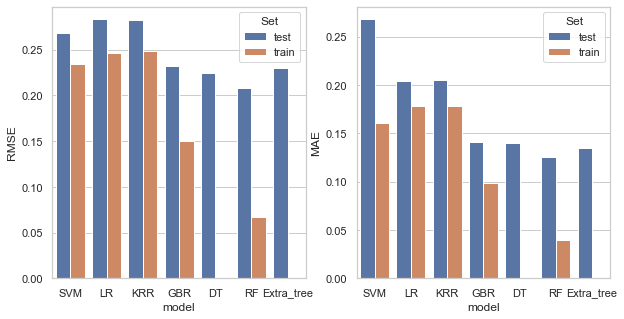

In [10]:
models=['SVM','LR','KRR',
        'GBR','DT','RF','Extra_tree',
       'SVM','LR','KRR',
        'GBR','DT','RF','Extra_tree']

performance = [testMSE1,
       testMSE2,
       testMSE3,
       testMSE4,
       testMSE5,
       testMSE6,
       testMSE7,
       
       trainMSE1,
       trainMSE2,
       trainMSE3,
       trainMSE4,
       trainMSE5,
       trainMSE6,
       trainMSE7,]

test_set=['test',
         'test',
         'test',
         'test',
         'test',
         'test',
         'test',
         
         'train',
         'train',
         'train',
         'train',
         'train',
         'train',
         'train']

d={'model':models, 'RMSE':performance,'Set':test_set}
df_bar=pd.DataFrame(data=d)

fig, axes = plt.subplots(1, 2,figsize=(10,5))
sns.barplot(ax=axes[0],x='model', y='RMSE', hue='Set', data=df_bar)

models2=['SVM','LR','KRR',
        'GBR','DT','RF','Extra_tree',
       'SVM','LR','KRR',
        'GBR','DT','RF','Extra_tree']

performance2 = [testMSE1,
       testMAE2,
       testMAE3,
       testMAE4,
       testMAE5,
       testMAE6,
       testMAE7,
       
       trainMAE1,
       trainMAE2,
       trainMAE3,
       trainMAE4,
       trainMAE5,
       trainMAE6,
       trainMAE7,]

test_set2=['test',
         'test',
         'test',
         'test',
         'test',
         'test',
         'test',
         
         'train',
         'train',
         'train',
         'train',
         'train',
         'train',
         'train']
d2={'model':models2, 'MAE':performance2,'Set':test_set2}
df_bar2=pd.DataFrame(data=d2)

sns.barplot(ax=axes[1],x='model', y='MAE', hue='Set', data=df_bar2)

In [11]:
positive=0
negative=0
for i in range(Y.shape[0]):
    if Y[i] <0:
        negative+=1
    if Y[i] >0:
        positive+=1
print(positive,negative)

1372 16


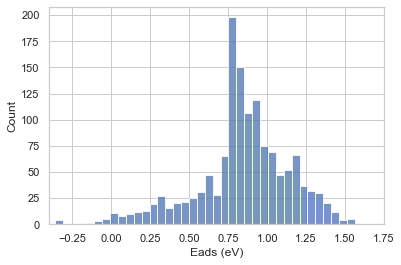

In [12]:
fig, ax = plt.subplots()
sns.histplot(ax=ax,data=Y)
ax.set_xlim(-0.4,1.75)
plt.show()

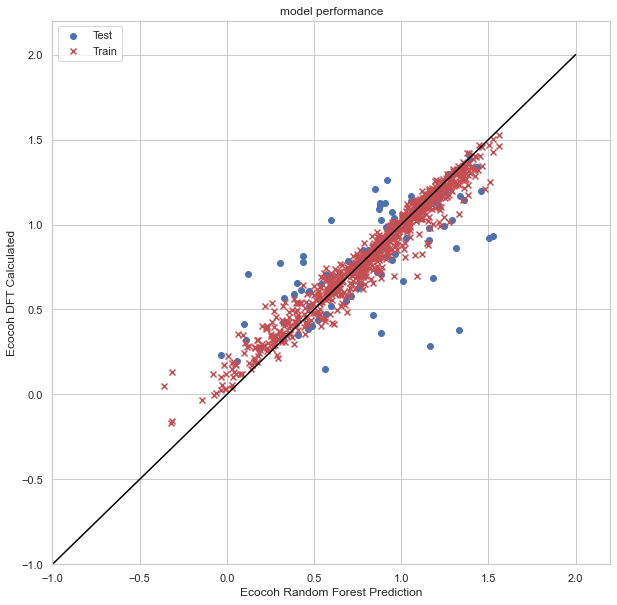

In [102]:

plt.figure(figsize=(10,10))
plt.xlabel('Ecocoh Random Forest Prediction')
plt.ylabel('Ecocoh DFT Calculated')

plt.xlim([-1, 2.2])
plt.ylim([-1, 2.2])

plt.title('model performance')
plt.scatter(y_test,RF_model(X_train,y_train,X_test), marker='o', color='b', label='Test')
plt.scatter(y_train,RF_model(X_train,y_train,X_train),marker='x', color='r',label='Train')
plt.plot([-2,2],[-2,2],color='black')
plt.legend()

In [26]:
def test_model(model,X_test):
    yhat = model.predict(X_test)
    MAE = mean_absolute_error(yhat,y_test)
    RMSE= mean_squared_error(yhat,y_test,squared=False)
    #print(MAE,RMSE)
    return MAE,RMSE

In [99]:
mae1=[]
mae2=[]
rmse1=[]
rmse2=[]
for i in range(50):
    reg1 = RandomForestRegressor().fit(X_train, y_train)
    reg2 = RandomForestRegressor(criterion="mse",n_estimators=105,max_depth=180,min_samples_split=8).fit(X_train, y_train)
    s1,s2 = test_model(reg1,X_test)
    d1,d2 = test_model(reg2,X_test)
    
    mae1.append(s1)
    mae2.append(d1)
    rmse1.append(s2)
    rmse2.append(d2)
    
print(np.mean(mae1),np.mean(rmse1))
print(np.mean(mae2),np.mean(rmse2))
print('MAE improvement= '+str(np.mean(mae1)-np.mean(mae2)))
print('RMSE improvement= '+str(np.mean(rmse1)-np.mean(rmse2)))

0.1255869913669065 0.2100719861770683
0.12591443763322183 0.20578255702267687
MAE improvement= -0.0003274462663153399
RMSE improvement= 0.004289429154391428


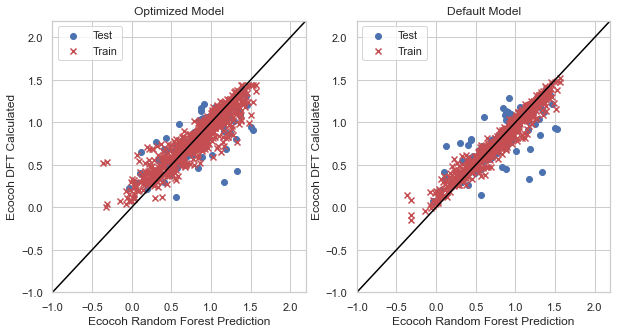

In [171]:
reg2 = RandomForestRegressor(criterion="mse",n_estimators=105,max_depth=180,min_samples_split=8).fit(X_train, y_train)
yhat1 = reg2.predict(X_test)
yhat2 = reg2.predict(X_train)

fig, (ax1,ax2) = plt.subplots(1, 2,figsize=(10,5))    
#ax1.figure(figsize=(10,10))
ax1.set_xlabel('Ecocoh Random Forest Prediction')
ax1.set_ylabel('Ecocoh DFT Calculated')

ax1.set_xlim([-1, 2.2])
ax1.set_ylim([-1, 2.2])

ax1.set_title('Optimized Model')
ax1.scatter(y_test,yhat1, marker='o', color='b', label='Test')
ax1.scatter(y_train,yhat2,marker='x', color='r',label='Train')
ax1.plot([-2,3],[-2,3],color='black')
ax1.legend()

ax2.set_title('Default Model')
ax2.scatter(y_test,RF_model(X_train,y_train,X_test), marker='o', color='b', label='Test')
ax2.scatter(y_train,RF_model(X_train,y_train,X_train),marker='x', color='r',label='Train')
ax2.plot([-2,3],[-2,3],color='black')
ax2.set_xlim([-1, 2.2])
ax2.set_ylim([-1, 2.2])
ax2.set_xlabel('Ecocoh Random Forest Prediction')
ax2.set_ylabel('Ecocoh DFT Calculated')
ax2.legend()
plt.savefig('RF_models.png')

NameError: name 'yhat' is not defined

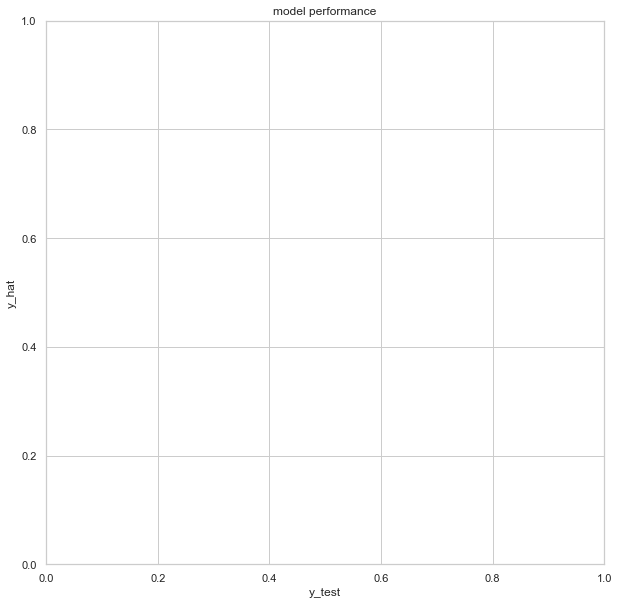

In [14]:
plt.figure(figsize=(10,10))
plt.xlabel('y_test')
plt.ylabel('y_hat')

#plt.xlim([-1238.5, -1233])
#plt.ylim([-1238.5, -1233])

plt.title('model performance')
plt.scatter(y_test,yhat, marker='o', color='b')
plt.scatter(y_train,regr.predict(X_train),marker='x', color='r')


In [ ]:
plt.hist(y_test,bins=40)

In [115]:
regr = MLPRegressor(hidden_layer_sizes=(100),solver='lbfgs',learning_rate='adaptive', early_stopping=True,max_iter=3000).fit(X_train, y_train)
yhat_NN = regr.predict(X_test)
print(mean_absolute_error(yhat_NN,y_test))
print(mean_squared_error(yhat_NN,y_test))

0.1606427207503322
0.05969682094791124


/Users/zach/opt/anaconda3/envs/ml_course/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [ ]:
    reg2 = MLPRegressor(activation="tanh",hidden_layer_sizes=(75,100,50),max_iter=1000,solver='lbfgs').fit(X_train, y_train)


In [168]:
mae1=[]
mae2=[]
rmse1=[]
rmse2=[]
for i in range(10):
    reg1 = MLPRegressor(activation="tanh",hidden_layer_sizes=(100),max_iter=1000,solver='adam').fit(X_train, y_train)
    reg2 = MLPRegressor(activation="tanh",hidden_layer_sizes=(75,100,50),max_iter=1000,solver='lbfgs',
                       alpha=0.00001,learning_rate='adaptive').fit(X_train, y_train)
    s1,s2 = test_model(reg1,X_test)
    d1,d2 = test_model(reg2,X_test)
    
    mae1.append(s1)
    mae2.append(d1)
    rmse1.append(s2)
    rmse2.append(d2)
    
print(np.mean(mae1),np.mean(rmse1))
print(np.mean(mae2),np.mean(rmse2))
print('MAE improvement= '+str(np.mean(mae1)-np.mean(mae2)))
print('RMSE improvement= '+str(np.mean(rmse1)-np.mean(rmse2)))

/Users/zach/opt/anaconda3/envs/ml_course/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/zach/opt/anaconda3/envs/ml_course/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/zach/opt/anaconda3/envs/ml_course/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: C

0.19773564562198417 0.27677205934725674
0.15344257354465832 0.245822411563223
MAE improvement= 0.04429307207732586
RMSE improvement= 0.03094964778403375


/Users/zach/opt/anaconda3/envs/ml_course/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


/Users/zach/opt/anaconda3/envs/ml_course/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


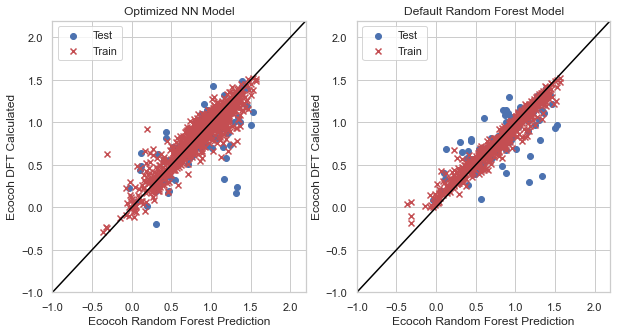

In [170]:
reg2 = MLPRegressor(activation="tanh",hidden_layer_sizes=(75,100,50),max_iter=1000,solver='lbfgs',
                       alpha=0.00001,learning_rate='adaptive').fit(X_train, y_train)
yhat1 = reg2.predict(X_test)
yhat2 = reg2.predict(X_train)

fig, (ax1,ax2) = plt.subplots(1, 2,figsize=(10,5))    
#ax1.figure(figsize=(10,10))
ax1.set_xlabel('Ecocoh Random Forest Prediction')
ax1.set_ylabel('Ecocoh DFT Calculated')

ax1.set_xlim([-1, 2.2])
ax1.set_ylim([-1, 2.2])

ax1.set_title('Optimized NN Model')
ax1.scatter(y_test,yhat1, marker='o', color='b', label='Test')
ax1.scatter(y_train,yhat2,marker='x', color='r',label='Train')
ax1.plot([-2,3],[-2,3],color='black')
ax1.legend()

ax2.set_title('Default Random Forest Model')
ax2.scatter(y_test,RF_model(X_train,y_train,X_test), marker='o', color='b', label='Test')
ax2.scatter(y_train,RF_model(X_train,y_train,X_train),marker='x', color='r',label='Train')
ax2.plot([-2,3],[-2,3],color='black')
ax2.set_xlim([-1, 2.2])
ax2.set_ylim([-1, 2.2])
ax2.set_xlabel('Ecocoh Random Forest Prediction')
ax2.set_ylabel('Ecocoh DFT Calculated')
ax2.legend()
plt.savefig('NN_RF.png')

In [135]:
coefs = reg1.coefs_
bias = reg1.intercepts_
bias

[array([ 0.03193112,  0.20666656,  0.12995538, -0.06061856,  0.05711689,
        -0.15525101,  0.02545101,  0.10758296,  0.16903053,  0.01644742,
        -0.10919869,  0.19036262, -0.06985857,  0.06531626, -0.19105039,
         0.09257834,  0.14467117,  0.11668196,  0.18824027,  0.04820405,
         0.16897349,  0.18986362, -0.0771981 ,  0.11481925, -0.07367429,
        -0.0024069 ,  0.01016887,  0.08895261, -0.01615375, -0.19935328,
        -0.14714626, -0.08060167, -0.18007701, -0.04442856, -0.2012239 ,
         0.06493207,  0.00142898,  0.15887367,  0.05895875,  0.24021766,
         0.11820864, -0.0213796 ,  0.02339148, -0.07056812,  0.00258068,
        -0.15736984,  0.07984268,  0.13525255,  0.1391008 , -0.20113688,
        -0.21625085,  0.0654833 , -0.09686257, -0.18883794,  0.03233621,
         0.09371306,  0.11679265,  0.01294331, -0.01720606, -0.08050673,
        -0.0593289 , -0.13287918, -0.06812218,  0.13221564, -0.05286157,
         0.06482205,  0.10406319, -0.05329132,  0.1

In [139]:
print(coefs[0].shape,coefs[1].shape)

(26, 100) (100, 1)


In [140]:
print(bias[0].shape,bias[1].shape)

(100,) (1,)


In [141]:
len(bias)

2

In [ ]:
#Joller Model in TF 2.0 (model2,history2,y2)

def get_new_model(input_shape):

    model = Sequential([
                        Dense(32,input_shape=input_shape,activation='tanh', use_bias=False),
                        Dense(32,input_shape=input_shape,activation='tanh', use_bias=False),
                        Dense(12,input_shape=input_shape,activation='tanh', use_bias=False),
                        Dense(1,input_shape=input_shape,activation="linear"),
                        #Dense(6,input_shape=input_shape,activation='tanh', use_bias=False),
                        #Dense(1,activation="linear",use_bias=False)
    ])
    
    opt = tf.keras.optimizers.Adam(learning_rate=0.01)
    #mse = tf.keras.metrics.mean_squared_error()
    #mae = tf.keras.metrics.MeanAbsoluteError()


    model.compile(optimizer=opt, loss='mae', metrics=['mae','mse'])
    
    return model

#joller data

model = get_new_model(X_train.shape)
model.summary()

In [ ]:
history = model.fit(X_train, y_train, epochs=500,validation_data=(X_test,y_test))

In [ ]:
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['val_mae'],label='val')
plt.plot(history.history['mae'],label='train')
plt.title('model accuracy')
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [ ]:
ran= pd.read_csv('all_Eads.csv')

In [ ]:
fig, ax = plt.subplots()
sns.histplot(data=ran)
ax.set_xlim(-2.5,3.5)
plt.show()

In [ ]:
fig, ax = plt.subplots()
sns.histplot(ax=ax,data=Y)
ax.set_xlim(-2.5,3.5)
plt.show()